# Computer Vision - Model Application
*Eleonora Pedrini-Pedroli, Leo Rettich*

The following notebook loads the prepared dataset from a pickle file and shows a possible application of the model by creating a predicted classification map image overlay.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

from google.colab import drive

from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from skimage import data, color, io, img_as_float

Load model

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model = keras.models.load_model('gdrive/MyDrive/Computer_Vision/model')

Load large image data, file `CRC-Prim-HE-10_APPLICATION.tif`

In [ ]:
!wget --no-check-certificate "https://github.com/toelt-llc/HSLU-Computer-Vision-Lab-Student-Version/archive/refs/heads/main.zip" -O "/tmp/data.zip"

--2023-03-20 19:13:51--  https://github.com/toelt-llc/HSLU-Computer-Vision-Lab-Student-Version/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/toelt-llc/HSLU-Computer-Vision-Lab-Student-Version/zip/refs/heads/main [following]
--2023-03-20 19:13:52--  https://codeload.github.com/toelt-llc/HSLU-Computer-Vision-Lab-Student-Version/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/data.zip’

/tmp/data.zip           [     <=>            ] 991.56M  13.5MB/s    in 95s     

2023-03-20 19:15:29 (10.5 MB/s) - ‘/tmp/data.zip’ saved [1039730643]



In [ ]:
zip_ref = zipfile.ZipFile('/tmp/data.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
dir = "/tmp/HSLU-Computer-Vision-Lab-Student-Version-main/data/large_images"

In [ ]:
test_image = img_to_array(load_img(os.path.join(dir, 'CRC-Prim-HE-10_APPLICATION.tif')))
test_image /= 255

In [ ]:
test_image.shape

(5000, 5000, 3)

Show the full, original image

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(test_image)

Output hidden; open in https://colab.research.google.com to view.

Show an example of a 150x150 pixel subsection

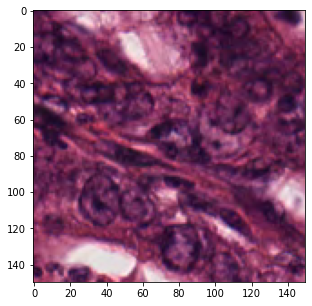

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(test_image[:150,:150])

Loop with a sliding window approach (window size 150x150, step size 50) over the image and predict all the windows. Build the color mask from the prediction results. 

In [ ]:
color_mask = np.zeros((5000, 5000, 3))

for x in range(0, 5000-150+1, 50):
  for y in range(0, 5000-150+1, 50):
    prediction = model.predict(np.expand_dims(test_image[x:x+150, y:y+150], axis=0), verbose=0)
    if prediction.argmax() != 2:
      if prediction.argmax() == 0:
        masking_color = [1, 0, 0]  # Red
      elif prediction.argmax() == 1:
        masking_color = [0, 0, 1]  # Blue
      color_mask[x+50:x+100, y+50:y+100] = masking_color

In [ ]:
img_hsv = color.rgb2hsv(test_image)
color_mask_hsv = color.rgb2hsv(color_mask)

In [ ]:
alpha = 0.6

# Replace the hue and saturation of the original image
# with that of the color mask
img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

Show the resulting classification map.

Red=TUMOR, Blue=STROMA

In [ ]:
img_masked = color.hsv2rgb(img_hsv)
f, (ax0, ax1) = plt.subplots(1, 2,
                             subplot_kw={'xticks': [], 'yticks': []},
                             figsize=(30, 30))
ax0.imshow(test_image, cmap=plt.cm.gray)
ax1.imshow(img_masked)
plt.show()

Output hidden; open in https://colab.research.google.com to view.